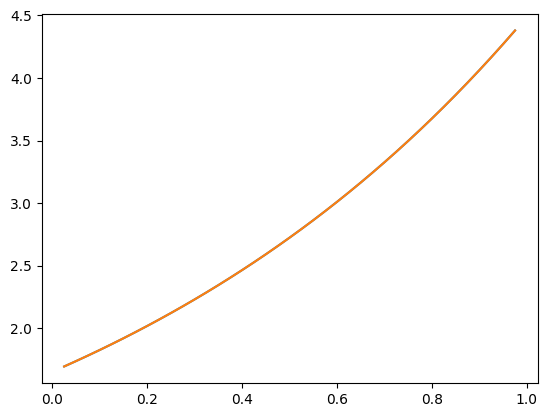

1.655211321915928e-05


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a=0
b=1

D=1

N=39

h=(b-a)/(N+1)

x=np.linspace(a,b,N+2)
xi=x[1:-1]


tfin=0.5
dt=0.002
tn=int(np.ceil(tfin/dt))


true_solution= lambda x1,t1,D: np.exp(D*t1)*np.exp(x1)

U=true_solution(xi,0,D)

  #### Section1
main_diag = -2 * np.ones(N )
off_diag = np.ones(N - 1)
Ax = np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)
Ax *= 1/ h**2



A = np.identity(N)-0.5*dt*D*(Ax)



for i in range(tn+1):# range(1):
  #### Section 2
    t=(i)*dt
    u1=true_solution(a,t,D)
    u2=true_solution(b,t,D)

    Uext = 0*x
    Uext[1:-1]=U


    Uext[0] = u1
    Uext[-1] = u2

    L=1/ h**2*(Uext[2:]-2*Uext[1:-1]+Uext[:-2])


  #### Section 3
    B=U+0.5*D*dt*L

    t=(i+1)*dt

    u1=true_solution(a,t,D)
    u2=true_solution(b,t,D)

    B[0] += 0.5*D*dt*u1/(h**2)
    B[-1] += 0.5*D*dt*u2/(h**2)

  ####

  #### Section 4
    U = np.linalg.solve(A, B)
  ####


plt.plot(xi,U)
plt.plot(xi,true_solution(xi,t,D))


plt.show()

Err=(np.max(np.abs(true_solution(xi,t,D)-U)))
print(Err)